<a href="https://colab.research.google.com/github/KIMMOOKYONG/COLAB-NOTENOOK/blob/main/EH%EA%B8%B0%EC%97%85%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설치

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 모듈 설치

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 라이브러리 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import yfinance as yf

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [5]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [26]:
!pip install mpl_finance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 시간 정보가 포함된 데이터 살펴보기

In [6]:
df = yf.download("EH", start="2019-01-01", end="2021-04-22", progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,290800
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,157600
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,221400
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,403800
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,325100
...,...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,1632300
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,3954000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,2985900


In [7]:
eh_df = df[["Close"]]
eh_df = eh_df.reset_index()
eh_df.columns = ["day", "price"]
eh_df["day"] = pd.to_datetime(eh_df["day"])
# eh_df.index = eh_df["day"]
eh_df.set_index("day", inplace=True)
eh_df

,price
day,
2019-12-13,12.900000
2019-12-16,12.500000
2019-12-17,11.070000
2019-12-18,9.520000
2019-12-19,9.400000
...,...
2021-04-15,28.930000
2021-04-16,27.910000
2021-04-19,24.790001


In [8]:
eh_train_df = eh_df[:335]
eh_train_df

,price
day,
2019-12-13,12.900000
2019-12-16,12.500000
2019-12-17,11.070000
2019-12-18,9.520000
2019-12-19,9.400000
...,...
2021-04-08,34.070000
2021-04-09,34.340000
2021-04-12,29.200001


In [9]:
eh_test_df = eh_df[335:]
eh_test_df

,price
day,
2021-04-15,28.930000
2021-04-16,27.910000
2021-04-19,24.790001
2021-04-20,24.580000
2021-04-21,25.820000


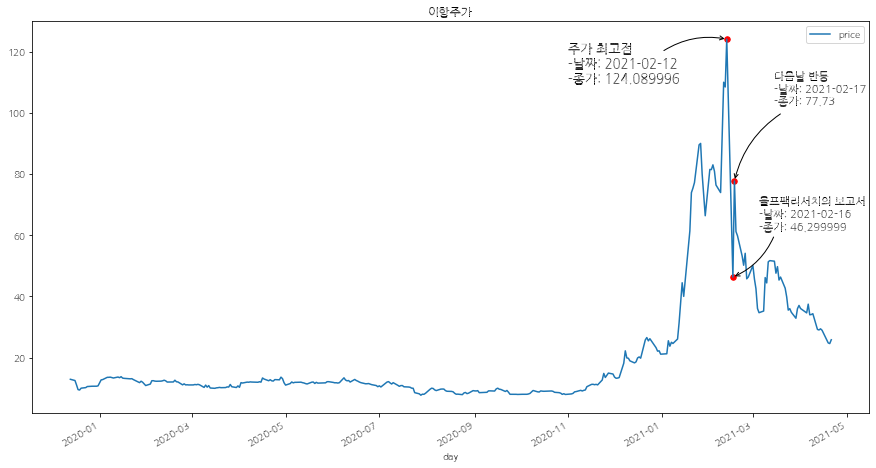

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
eh_df.plot(ax=ax)

# 주가 최고점
ax.annotate("", xy=("2021-02-12", 124.089996), xytext=("2021-01-01", 120),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2")
            )
plt.text("2020-11-01",110, "주가 최고점 \n-날짜: 2021-02-12 \n-종가: 124.089996",fontsize=13)
# 공매도 리포트 직후 (울프팩리서치의 보고서)
ax.annotate("", xy=("2021-02-16" ,46.299999), xytext=("2021-03-15", 60),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
           )
plt.text("2021-03-05",62, "울프팩리서치의 보고서 \n-날짜: 2021-02-16 \n-종가: 46.299999",fontsize=11)

# 다음날의 반등 
ax.annotate("", xy=("2021-02-17" ,77.73), xytext=("2021-03-20", 100),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text("2021-03-15",103, "다음날 반등 \n-날짜: 2021-02-17 \n-종가: 77.73",fontsize=11)

# Scatter plot 추가
y1 = ["2021-02-12", "2021-02-16", "2021-02-17"] 
y2 = [124.089996, 46.299999, 77.73]
plt.scatter(y1,y2,s=30,color="r")

plt.title("이항주가")
plt.show()

In [22]:
eh_df_1 = yf.download("EH", 
                      start="2019-01-01", 
                      end="2021-04-22", 
                      progress=False)

eh_df_1 = eh_df_1.reset_index()
eh_df_1.columns = ["day", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
eh_df_1["day"] = pd.to_datetime(eh_df_1["day"])
eh_df_1.set_index("day", inplace=True)
eh_df_1

,Open,High,Low,Close,Adj Close,Volume
day,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,290800
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,157600
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,221400
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,403800
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,325100
...,...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,1632300
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,3954000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,2985900


In [23]:
eh_df_vol = eh_df_1[["Volume"]]
eh_df_vol

,Volume
day,
2019-12-13,290800
2019-12-16,157600
2019-12-17,221400
2019-12-18,403800
2019-12-19,325100
...,...
2021-04-15,1632300
2021-04-16,3954000
2021-04-19,2985900


In [24]:
eh_df_1 = eh_df_1[["Open", "High", "Low", "Close", "Adj Close"]]
eh_df_1

,Open,High,Low,Close,Adj Close
day,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000
...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001


# 주가 데이터 시각화

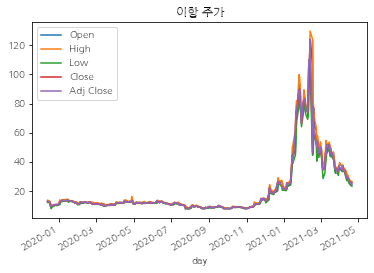

In [25]:
eh_df_1.plot()
plt.title("이항 주가")
plt.show()

 # 캔들 차트를 사용한 시각화

In [27]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

#matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import numpy as np

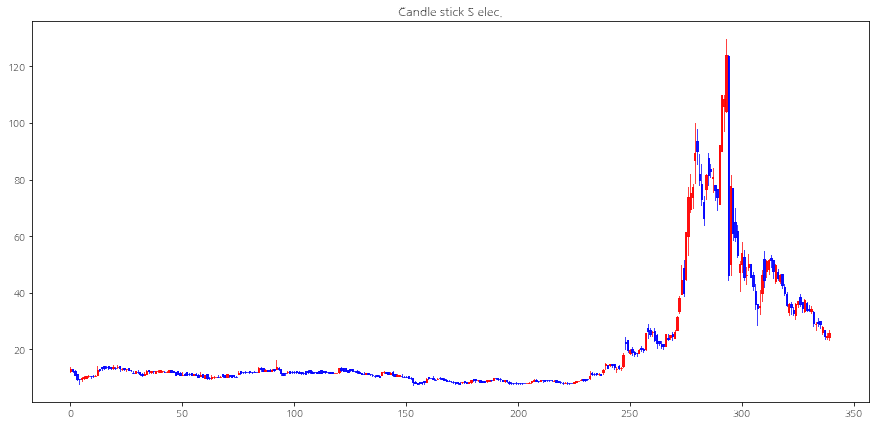

In [28]:
#차트와 피규어 그리기 준비 및 크기 설정
fig, ax = plt.subplots(figsize=(15,7)) 

# 시고저종 데이터를 통해 캔들 차트를 그리기 (순서를 반드시 시고저종으로 입력)
candlestick2_ohlc(ax,eh_df_1["Open"],eh_df_1["High"],eh_df_1["Low"],eh_df_1["Close"],width=0.6, colorup="r", colordown="b")

# 차트 타이틀 설정
plt.title("Candle stick S elec.")
plt.show()

# 봉차트

In [29]:
# 필요한 라이브러리 다운로드
from datetime import datetime 
import pandas_datareader.data as wb

start = datetime(2021,1,1) #시작날짜 
end = datetime(2021,3,2) #끝 날짜 
eh_df2 = yf.download("EH", start,end, progress=False)
eh_df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,22.000000,22.000000,20.209999,21.240000,21.240000,1233500
2021-01-05,21.180000,25.500000,21.020000,25.500000,25.500000,2294000
2021-01-06,24.120001,25.600000,23.299999,23.719999,23.719999,1167400
2021-01-07,24.500000,25.000000,23.799999,25.000000,25.000000,935000
2021-01-08,25.400000,25.990000,23.400999,24.610001,24.610001,1228000
2021-01-11,24.020000,27.000000,24.020000,26.059999,26.059999,1771500
2021-01-12,26.980000,31.740000,26.799999,31.400000,31.400000,3012200
2021-01-13,33.580002,38.970001,33.009998,37.980000,37.980000,4771500
2021-01-14,39.700001,49.860001,39.599998,44.459999,44.459999,6123900


In [30]:
#날짜 포멧을 일, 또는 연-월-일로 바꾸기 
print(eh_df2.index[0])
print(eh_df2.index[0].strftime("%d"))
print(eh_df2.index[0].strftime("%Y-%m-%d"))

2021-01-04 00:00:00
04
2021-01-04


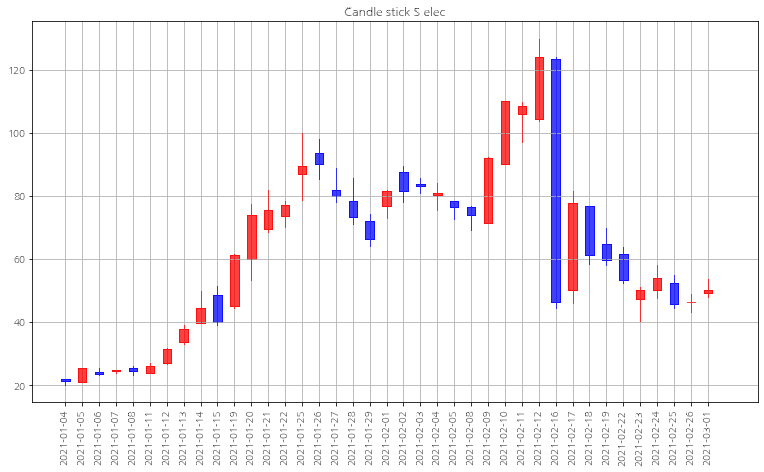

In [31]:
#다시 차트 그리기
fig, ax = plt.subplots(figsize=(13,7)) 

#x축의 눈금을 설정
day_list = []
name_list = []
for i, day in enumerate(eh_df2.index):    
    day_list.append(i) # 고정 축 list 생성
    name_list.append(day.strftime("%Y-%m-%d")) # 고정 축에 적힐 날짜 list 생성

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list)) #day_list를 받아서 리스트 안의 값의 위치에 고정 축 생성
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list)) #설정한 고정 축에 name_list 안의 값을 축에 출력

# Open시가, Hihg고가, Low저가, Close종가
candlestick2_ohlc(ax,eh_df2["Open"],eh_df2["High"],eh_df2["Low"],eh_df2["Close"], width=0.5, colorup="r", colordown="b")

plt.xticks(rotation = 90) #x축 각도 회전
#fig.autofmt_xdate() #날짜 형식으로 자동 format 지정
plt.title("Candle stick S elec")
plt.grid()
plt.show()

# 데이터확인

In [32]:
print(eh_df_1.shape)
print(eh_df_1.info())
eh_df_1.tail()

(340, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2019-12-13 to 2021-04-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       340 non-null    float64
 1   High       340 non-null    float64
 2   Low        340 non-null    float64
 3   Close      340 non-null    float64
 4   Adj Close  340 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB
None


,Open,High,Low,Close,Adj Close
day,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000


In [33]:
eh_df_1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [34]:
eh_df_1.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

In [35]:
eh_df_1.describe()

,Open,High,Low,Close,Adj Close
count,340.000000,340.000000,340.000000,340.000000,340.000000
mean,20.289003,21.525779,18.815729,20.158100,20.158100
std,19.676354,21.758806,17.447580,19.728020,19.728020
min,7.980000,8.035000,7.590000,7.700000,7.700000
25%,10.007500,10.530000,9.707500,10.037500,10.037500
50%,12.035000,12.300000,11.535000,11.910000,11.910000
75%,20.313499,21.280001,19.251250,19.962499,19.962499
max,123.497002,129.800003,103.800003,124.089996,124.089996


# 이동평균선 계산해서 att추가하기

## 종가를 이용한 이동평균선 계산, 추가

In [36]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = eh_df_1['Adj Close'].rolling(window=5).mean()
ma20 = eh_df_1['Adj Close'].rolling(window=20).mean()
ma60 = eh_df_1['Adj Close'].rolling(window=60).mean()
ma120 = eh_df_1['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
eh_df_1.insert(len(eh_df_1.columns), "MA5", ma5)
eh_df_1.insert(len(eh_df_1.columns), "MA20", ma20)
eh_df_1.insert(len(eh_df_1.columns), "MA60", ma60)
eh_df_1.insert(len(eh_df_1.columns), "MA120", ma120)

## 거래량을 이용한 이동평균선 계산, 추가

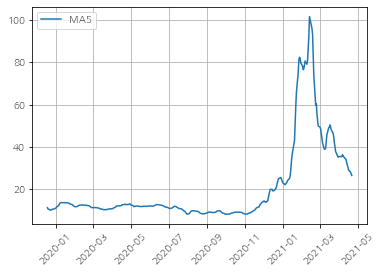

In [37]:
#이동평균값 plot 그리기
plt.plot(eh_df_1.index,eh_df_1["MA5"], label="MA5")
plt.legend(loc="best") #라벨 위치 설정
plt.xticks(rotation=45) #x축 좌표각도
plt.grid() #격자
plt.show() #현재까지 그려진 그래프 보여주기

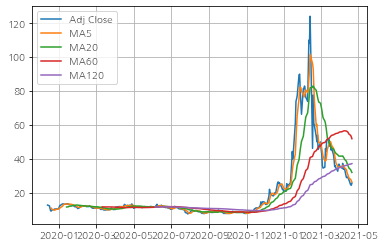

In [38]:
#차트에 표현할 요소 설정
plt.plot(eh_df_1["Adj Close"], label="Adj Close")
plt.plot(eh_df_1["MA5"], label="MA5")
plt.plot(eh_df_1["MA20"], label="MA20")
plt.plot(eh_df_1["MA60"], label="MA60")
plt.plot(eh_df_1["MA120"], label="MA120")

#"best"를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc="best")

#격자 그리기
plt.grid()
plt.show()

# 주가변동율 추가 및 시각화

## 변동율 추가

In [39]:
# x일 행에 x+1일의 종가를 추가
eh_df_1["tomorrow Adj Close"]= eh_df_1["Adj Close"].shift(-1)

# 변동율 측정 => ((다음날종가)-(오늘종가))/오늘종가 
eh_df_1["Fluctuation"]= eh_df_1["tomorrow Adj Close"]-eh_df_1["Adj Close"]
eh_df_1["Fluctuation Rate"]= eh_df_1["Fluctuation"]/eh_df_1["Adj Close"]
eh_df_1["price"]= eh_df_1["Adj Close"]
eh_df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078,NaN,NaN,NaN,10.000000,0.600000,0.063830,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001


In [40]:
eh_train_df = eh_df_1[:335]
eh_train_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078000,NaN,NaN,NaN,10.000000,0.600000,0.063830,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,34.220001,35.750000,33.599998,34.070000,34.070000,35.230000,40.7140,56.605167,35.868958,34.340000,0.270000,0.007925,34.070000
2021-04-09,33.500000,35.480000,32.810001,34.340000,34.340000,34.889999,39.8660,56.654167,36.079958,29.200001,-5.139999,-0.149680,34.340000
2021-04-12,33.130001,33.400002,28.100000,29.200001,29.200001,33.810000,38.7415,56.507833,36.248458,29.020000,-0.180000,-0.006164,29.200001


In [41]:
eh_test_df = eh_df_1[335:]
eh_test_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000,27.122,32.8160,53.046000,37.176125,25.820000,1.240000,0.050448,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000,26.406,32.1170,51.984167,37.321625,NaN,NaN,NaN,25.820000


## 추가한 데이터로 시각화

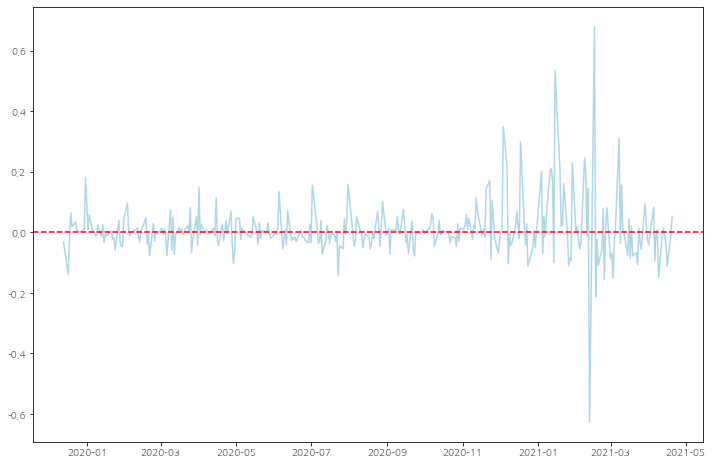

In [42]:
plt.figure(figsize=(12,8)) 
plt.plot(eh_df_1.index,eh_df_1["Fluctuation Rate"], color = "lightblue")
plt.axhline( y = 0, color = "red", ls = "--") #기준선추가 , axhline() 함수의 첫번째 인자는 y 값으로서 수평선의 위치가 된다.
plt.show()

# 예측: ARIMA 예측 모델

In [43]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(eh_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = "c", full_output = True, disp = True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1020.718
Method:                       css-mle   S.D. of innovations              5.125
Date:                Mon, 27 Jun 2022   AIC                           2053.437
Time:                        11:54:15   BIC                           2076.304
Sample:                             1   HQIC                          2062.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0909      0.062      1.477      0.141      -0.030       0.212
ar.L1.D.y      0.3982      0.104      3.819      0.000       0.194       0.603
ar.L2.D.y      0.5558      0.099      5.633      0.0

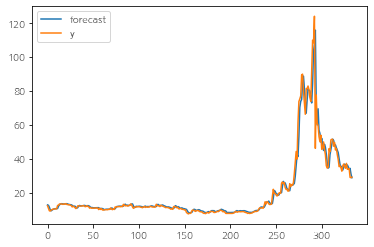

In [44]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

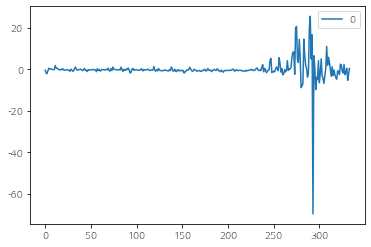

In [45]:
# 잔차의 변동을 시각화
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

# 이항주가의 변동률과, ARIMA 모델의 잔차 그래프

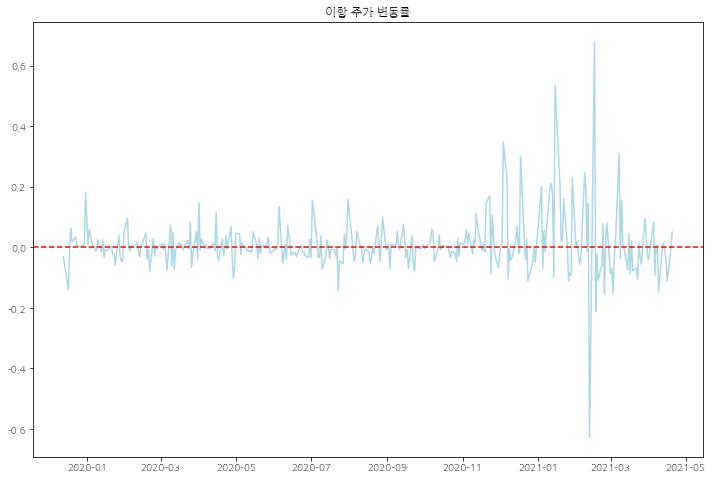

In [49]:
plt.figure(figsize=(12,8)) 
plt.plot(eh_df_1["Fluctuation Rate"], color = "lightblue")
plt.axhline( y = 0, color = "red", ls = "--") #기준선추가 , axhline() 함수의 첫번째 인자는 y 값으로서 수평선의 위치가 됩니다.
plt.title("이항 주가 변동률")
plt.show()

<Figure size 864x576 with 0 Axes>

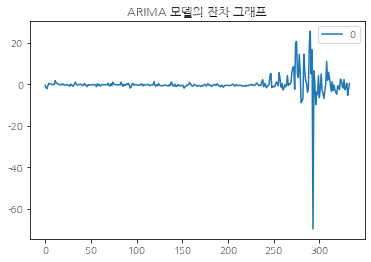

In [50]:
plt.figure(figsize=(12,8)) 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title("ARIMA 모델의 잔차 그래프")
plt.show()

# ARIMA 모델 평가

In [51]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터넷으로부터 5일 뒤를 예측한다.
eh_test_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000,27.122,32.8160,53.046000,37.176125,25.820000,1.240000,0.050448,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000,26.406,32.1170,51.984167,37.321625,NaN,NaN,NaN,25.820000


In [52]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-21)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-21)
test_y = eh_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

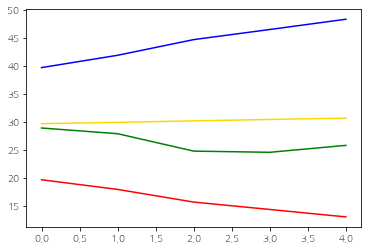

In [53]:
# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = "gold")

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = "red")

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = "blue")

# 실제 가격 그래프
plt.plot(test_y, color = "green")

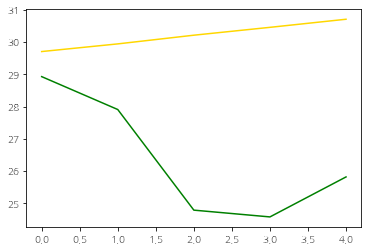

In [54]:
plt.plot(pred_arima_y, color = "gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color = "green") # 실제 가격 그래프

In [55]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 17.5 MB/s 
     |████████████████████████████████| 179 kB 41.0 MB/s 
     |████████████████████████████████| 69 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.1 which is incompatible.


In [56]:
from fbprophet import Prophet

eh_df = eh_df.reset_index()

# prophet을 사용하기 위해서는 다음과 같이 피처명을 변경해야 한다. : "ds", "y"
eh_df.columns = ["ds", "y"]
eh_train_df = eh_df[:335]
eh_test_df = eh_df[335:]

In [57]:
prophet = Prophet(seasonality_mode = "multiplicative",
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(eh_train_df)

In [58]:
future_data = prophet.make_future_dataframe(periods = 5, freq = "d")
forecast_data = prophet.predict(future_data)
forecast_data[["ds","yhat", "yhat_lower", "yhat_upper"]].tail(5)

,ds,yhat,yhat_lower,yhat_upper
335,2021-04-15,32.493016,26.917009,38.171186
336,2021-04-16,32.556359,26.479104,38.138020
337,2021-04-17,29.263394,23.419229,34.885861
338,2021-04-18,29.555267,23.559699,35.211065
339,2021-04-19,32.742556,27.204201,39.012299


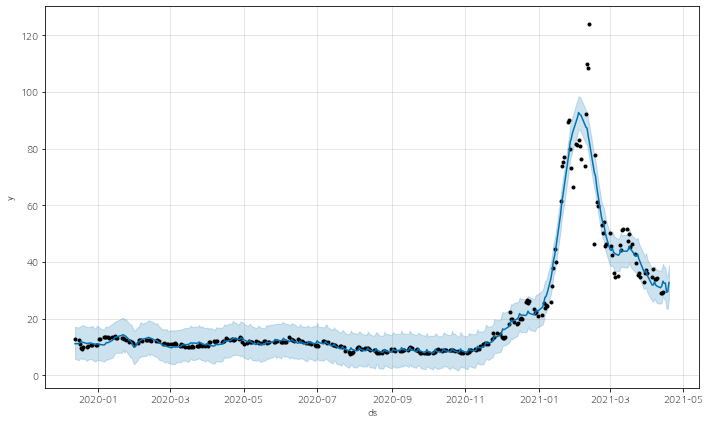

In [59]:
fig1 = prophet.plot(forecast_data)

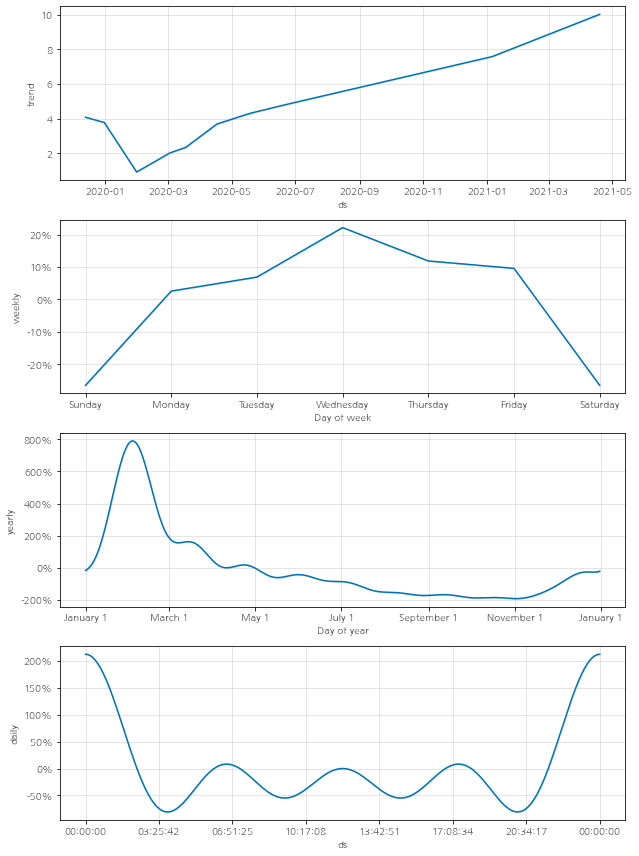

In [60]:
fig2 = prophet.plot_components(forecast_data)

Text(0.5, 1.0, '값 비교')

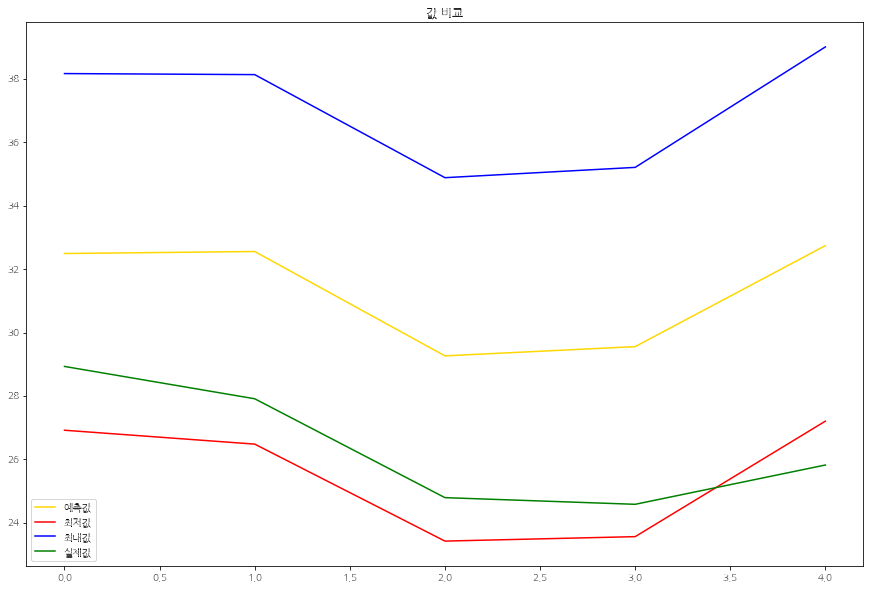

In [61]:
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = eh_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = "gold")

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = "red")

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = "blue")

# 실제 가격 그래프
plt.plot(test_y, color = "green")

plt.legend(["예측값", "최저값","최대값","실제값"])
plt.title("값 비교")

# 활용: 더나은 결과를 위한 방법

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


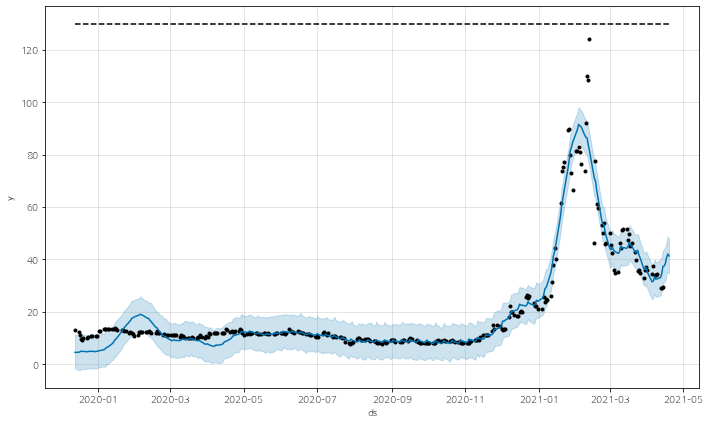

In [62]:
# 상한가 설정
eh_train_df["cap"] = 130

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = "multiplicative",
                 growth = "logistic",
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(eh_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = "d")

# 상한가 설정
future_data["cap"] = 130
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

# 이상치 제거

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


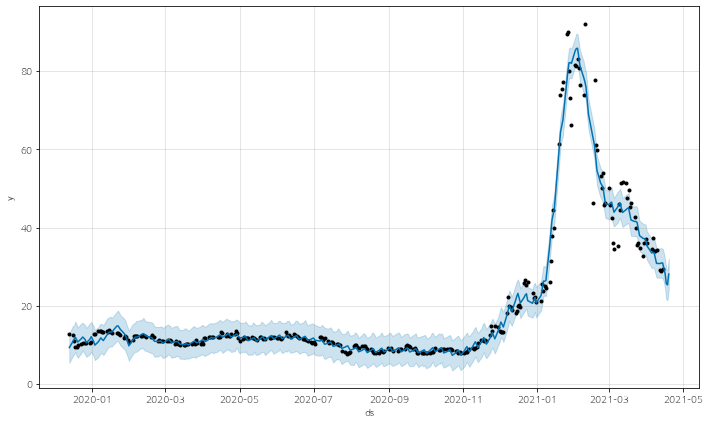

In [63]:
eh_train_df.loc[eh_train_df["y"] > 100, "y"] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = "multiplicative",
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(eh_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = "d")

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [64]:
pred_fbprophet_y_100 = forecast_data.yhat.values[-5:]

# 이상치 60넘는값 제거

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


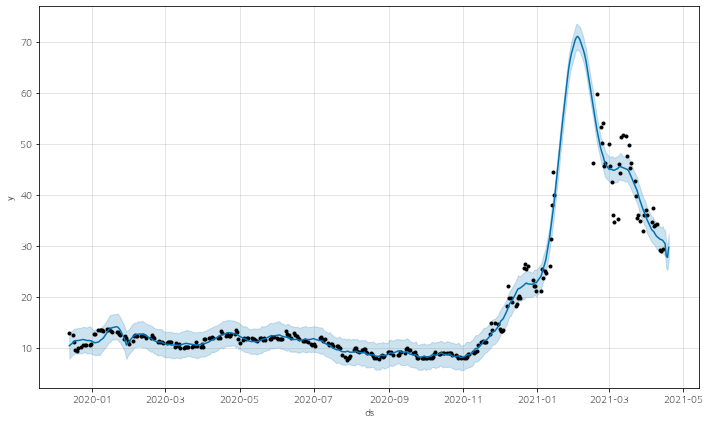

In [65]:
eh_train_df.loc[eh_train_df["y"] > 60, "y"] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = "multiplicative",
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(eh_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = "d")

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [66]:
pred_fbprophet_y_60 = forecast_data.yhat.values[-5:]

# Model 평가

In [67]:
df = pd.DataFrame({"ARIMA 예측값":pred_arima_y,
                   "FBprophet 예측값":  pred_fbprophet_y,
                   "FBprophet 이상치 제거 후(100) 예측값":pred_fbprophet_y_100,
                   "FBprophet 이상치 제거 후(60) 예측값":pred_fbprophet_y_60,
                   "실제값":test_y})

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(100) 예측값,FBprophet 이상치 제거 후(60) 예측값,실제값
0,29.707392,32.493016,29.646648,30.773897,28.930000
1,29.944918,32.556359,28.353928,30.458986,27.910000
2,30.214540,29.263394,25.766210,28.000833,24.790001
3,30.458108,29.555267,25.384193,27.748092,24.580000
4,30.709141,32.742556,28.146757,29.714593,25.820000


# 모델별 예측값 시각화

Text(0.5, 1.0, '이항 주가의 예측값 실제값 비교')

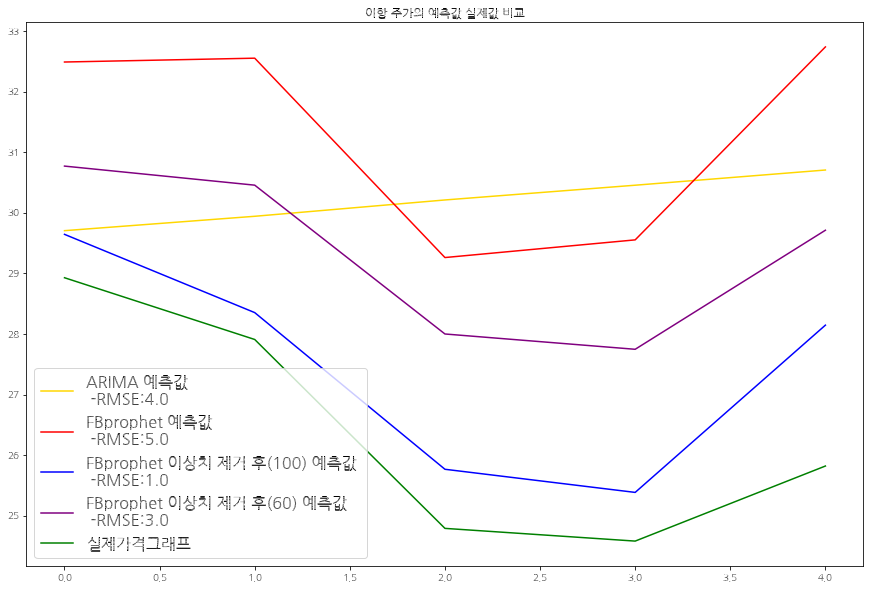

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet (이상치 100) 모델의  rmse
rmse_fbprophet_100 = sqrt(mean_squared_error(pred_fbprophet_y_100, test_y))

# 전처리 진행한 fbprophet (이상치 60) 모델의  rmse
rmse_fbprophet_60 = sqrt(mean_squared_error(pred_fbprophet_y_60, test_y))


# 모델이 예측한 가격 그래프
plt.plot(df[["ARIMA 예측값"]], color = "gold")

# 모델이 예측한 최저 가격 그래프
plt.plot(df[["FBprophet 예측값"]], color = "red")

# 모델이 예측한 최고 가격 그래프
plt.plot(df[["FBprophet 이상치 제거 후(100) 예측값"]], color = "blue")

# 모델이 예측한 최고 가격 그래프
plt.plot(df[["FBprophet 이상치 제거 후(60) 예측값"]], color = "purple")

# 실제 가격 그래프
plt.plot(test_y, color = "green")

plt.rc("legend", fontsize=16)
plt.legend(["ARIMA 예측값 \n -RMSE:" + str(round(rmse_arima,0)), 
            "FBprophet 예측값  \n -RMSE:" + str(round(rmse_fbprophet,0)),
            "FBprophet 이상치 제거 후(100) 예측값 \n -RMSE:" + str(round(rmse_fbprophet_100,0)),
            "FBprophet 이상치 제거 후(60) 예측값 \n -RMSE:" + str(round(rmse_fbprophet_60,0)),
           "실제가격그래프" ])
plt.title("이항 주가의 예측값 실제값 비교")